<a href="https://colab.research.google.com/github/nikesh11xx/Data-to-Decision-blog/blob/main/regression_metrics_and_standardscaller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loading libraries

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score


loading dataset

In [114]:
df = pd.read_csv('/content/Boston_Housing.csv')
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [115]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


<ipython-input-116-8562771a5d9e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AGE'])


<Axes: xlabel='AGE', ylabel='Density'>

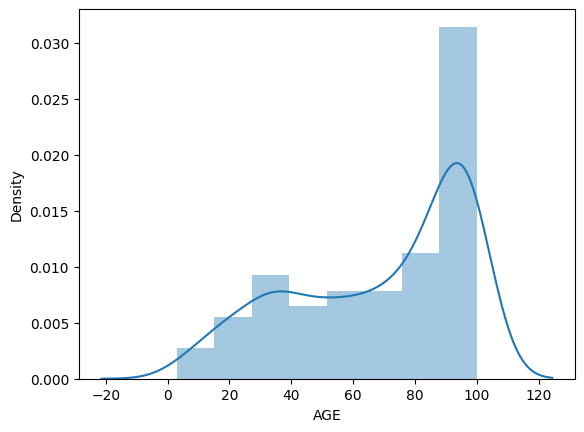

In [116]:
sns.distplot(df['AGE'])

In [117]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [118]:
X= df.iloc[:,5:7]
y = df.iloc[:,-1:]


In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

Standard scaler

In [120]:
scaler = StandardScaler()

scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_train.columns)

effect of scaling

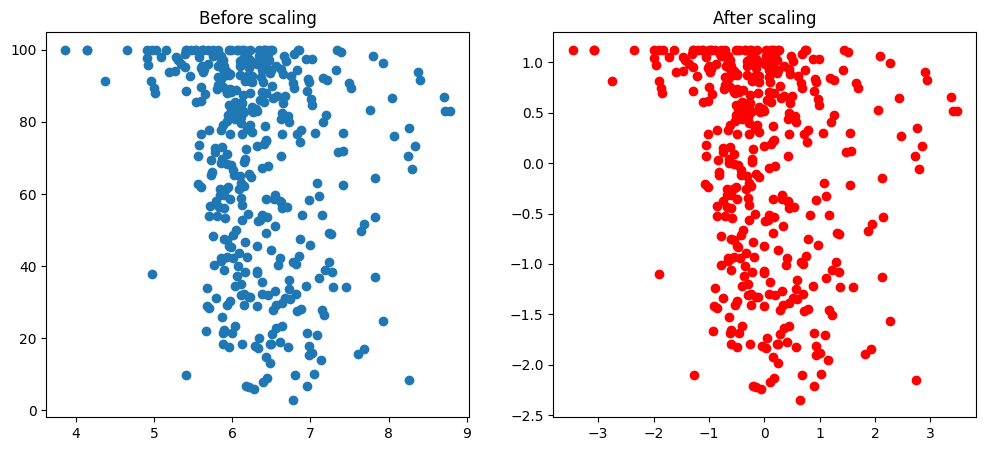

In [122]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['RM'],X_train['AGE'])
ax1.set_title('Before scaling')
ax2.scatter(X_train_scaled['RM'],X_train_scaled['AGE'],color='red')
ax2.set_title('After scaling')
plt.show()

kde plot

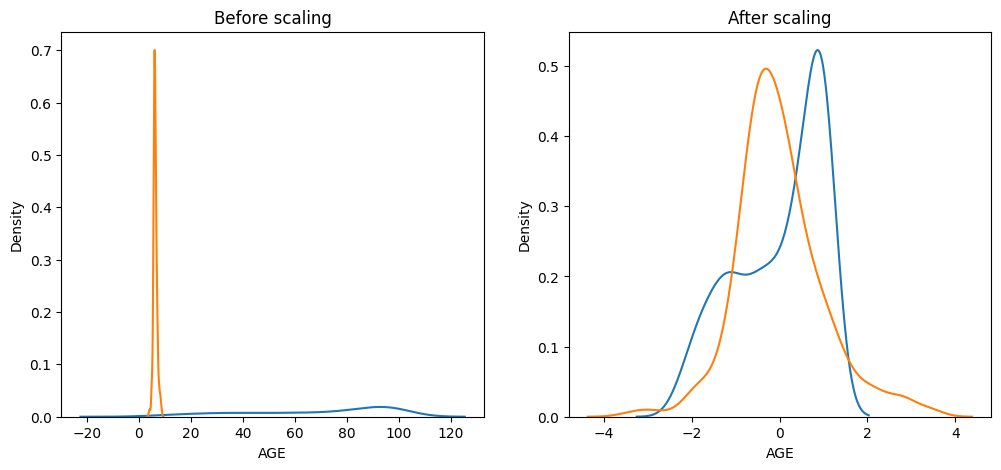

In [123]:
fig,(a1,a2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
a1.set_title('Before scaling')
sns.kdeplot(X_train['AGE'],ax=a1)
sns.kdeplot(X_train['RM'],ax=a1)


# after scaling
a2.set_title('After scaling')
sns.kdeplot(X_train_scaled['AGE'],ax=a2)
sns.kdeplot(X_train_scaled['RM'],ax=a2)
plt.show()

In [125]:
# without scaling
lr = LinearRegression()
lr.fit(X_train,y_train)

# after scaling
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled,y_train)

LinearRegression()

In [126]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test)


In [127]:
from sklearn.metrics import accuracy_score

print('Without scaling:', r2_score(y_test, y_pred))
print('With scaling:', r2_score(y_test, y_pred_scaled))


Without scaling: 0.45612277525967215
With scaling: -139.0454904493783


In [ ]:
# mean_square_error
mse = mean_squared_error(y_test,y_pred)
print(f'msa {mse}')

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
print('mae ',mae)

In [ ]:
# rmse
rmse = np.sqrt(mse)
print('rmse ',rmse)

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

In [ ]:
# adjusted r2 score

1-((1-r2)*(102-1)/(102-1-1))

#MAE mean absolute error

  |y1 - y^1| + |y2-y^2|+.....|yn-y^n| / n

  - y1 = its the value that is present in dataset
  - y^1 = its the value that the model predict


    Advantage
      - the mea unit and  out put unit is same
      - Robust outlier

    Disadvantage
      - the graph is not differenceable

# MSE mean squred error
  - (y1-y1^)2 + (y2-y2^)2 + (yn-yn^)
  - y1 = its the value that is present in dataset
  - y^1 = its the value that the model predict
  

#RMSE root mean square error



# r2 score

  -